# 占比

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [2]:
mpg = pl.read_csv("data/mpg.csv")
mpg.head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
str,str,f64,i64,i64,str,str,i64,i64,str,str
"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


## Simple Pie Chart


In [3]:
data = {
    "Scale": [
        ">300,000 tons per year",
        "100,000~300,000 tons per year",
        "<100,000 tons per year",
    ],
    "Proportion": ["0.2623", "0.2459", "0.4918"],
}

df = pl.DataFrame(data)
df.head()

Scale,Proportion
str,str
""">300,000 tons per year""","""0.2623"""
"""100,000~300,000 tons per year""","""0.2459"""
"""<100,000 tons per year""","""0.4918"""


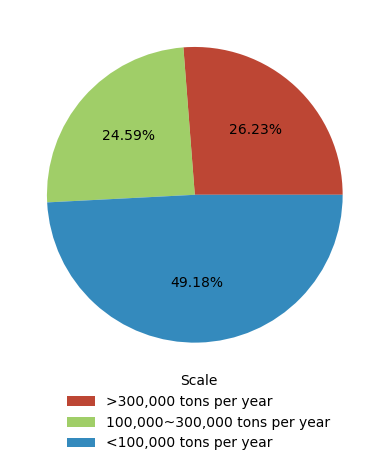

In [4]:
plt.pie(df["Proportion"], colors=["#bd4634", "#7fbd34bd", "#348ABD"], autopct="%.2f%%")

plt.legend(
    df["Scale"], title="Scale", bbox_to_anchor=(0.5, -0.45, 0.4, 0.5), frameon=False
)

## Pie Chart with Convex


In [5]:
mpg_group = mpg.group_by("class").len().with_row_index()
mpg_group

index,class,len
u32,str,u32
0,"""compact""",47
1,"""suv""",62
2,"""2seater""",5
3,"""subcompact""",35
4,"""midsize""",41
5,"""pickup""",33
6,"""minivan""",11


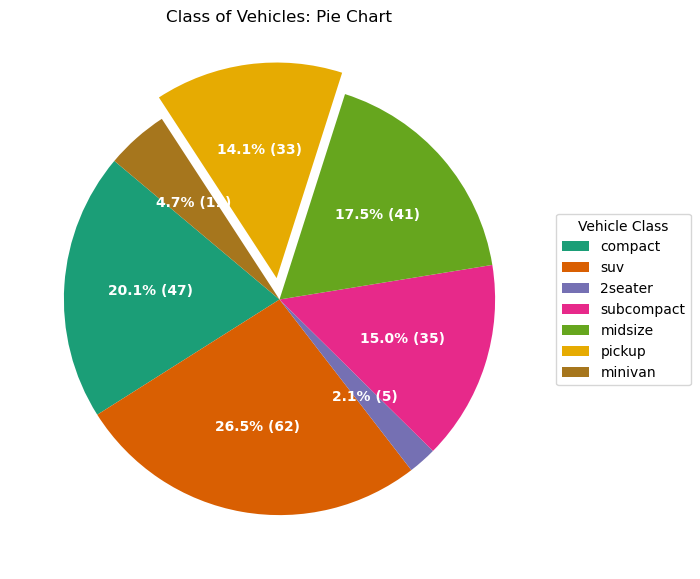

In [6]:
_, ax = plt.subplots(figsize=(12, 7), subplot_kw={"aspect": "equal"})

data = mpg_group["len"]
categories = mpg_group["class"]
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(pct, allvals) -> str:
    absolute = int(pct / 100.0 * allvals.sum())
    return f"{pct:.1f}% ({absolute})"


wedges, texts, autotexts = ax.pie(
    data,
    autopct=lambda pct: func(pct, data),
    textprops={"color": "w"},
    colors=plt.cm.Dark2.colors,
    startangle=140,
    explode=explode,
)

ax.legend(
    wedges,
    categories,
    title="Vehicle Class",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)
plt.setp(autotexts, size=10, weight=700)
ax.set(title="Class of Vehicles: Pie Chart")
plt.show()

## Pie Chart with Wedges


In [7]:
colors = ["#f94144", "#f8961e", "#f9c74f", "#90be6d", "#2b1ac9", "#2994e0", "#94428d"]
wedgeprops = {
    "edgecolor": "k",
    "linewidth": 2,
    "linestyle": "solid",
    "antialiased": True,
}

categories = mpg_group["class"]
data = mpg_group["len"]

_, ax = plt.subplots(figsize=(6, 6), subplot_kw={"aspect": "equal"})

wedges, texts, autotexts = ax.pie(
    data,
    colors=colors,
    autopct="%1.1f%%",
    startangle=60,
    pctdistance=0.75,
    wedgeprops=wedgeprops,
    textprops={"fontsize": 10, "color": "white"},
)

ax.set(title="Class of Vehicles: Pie Chart")
bbox_props = {"boxstyle": "square, pad=0.3", "fc": "w", "ec": "w", "lw": 0.5}

kw = {
    "arrowprops": {"arrowstyle": "-"},
    "bbox": bbox_props,
    "zorder": 0,
    "va": "center",
}

for k, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle, angleA=0, angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        categories[k],
        xy=(x, y),
        xytext=(1.2 * np.sign(x), 1.2 * y),
        horizontalalignment=horizontalalignment,
        **kw,
    )

plt.show()

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 600x600 with 1 Axes>